Note: you may need to restart the kernel to use updated packages.


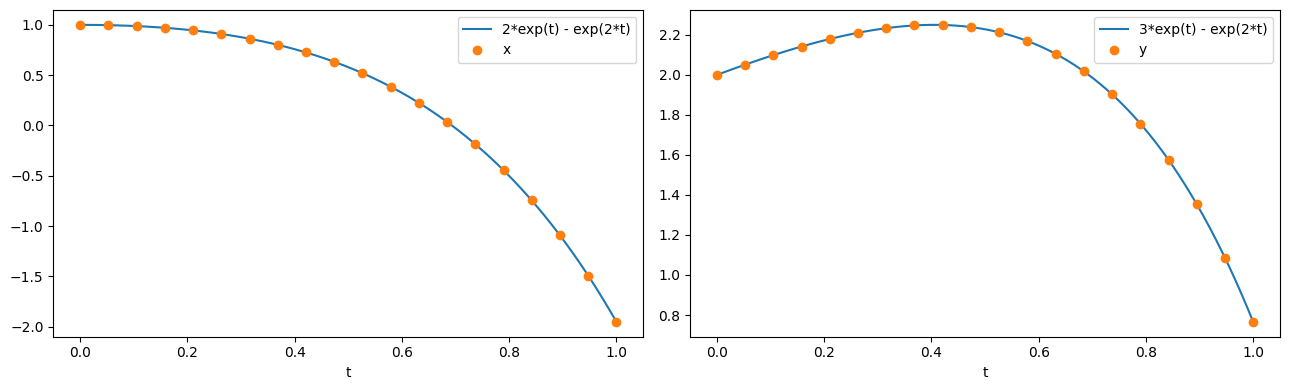

In [2]:
%pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
import pybamm
import numpy as np
import matplotlib.pyplot as plt

model = pybamm.BaseModel()

x = pybamm.Variable("x")
y = pybamm.Variable("y")

dxdt = 4 * x - 2 * y
dydt = 3 * x - y

"""rhs stands for Right-Hand Side of differential equations.
This tells PyBaMM that dx/dt and dy/dt are our governing equations."""
model.rhs = {x: dxdt, y: dydt}

"""Defines starting values at t=0:
x(0)=1,y(0)=2
Initial conditions are critical because differential equations have infinite solutions, and we need a starting point."""
model.initial_conditions = {x: pybamm.Scalar(1), y: pybamm.Scalar(2)}

model.variables = {"x": x, "y": y, "z": x + 4 * y}
"""Defines extra output variables for easy access"""

"""Discretization means converting the continuous differential equations into a computable form.
PyBaMM does this automatically.
Without this step, we cannot solve the equations numerically."""
disc = pybamm.Discretisation()  # use the default discretisation
disc.process_model(model);

solver = pybamm.ScipySolver()
"""pybamm.ScipySolver() is a built-in numerical solver in PyBaMM 
that uses SciPy’s ODE solvers to solve the system of equations.Think of ScipySolver() as a calculator that takes equations and initial conditions, 
then returns values of x and y at different time steps."""
t = np.linspace(0, 1, 20)
"""Creates an array of 20 equally spaced time points between 0 and 1."""
solution = solver.solve(model, t)
"""Passes the model to the solverPasses t, which tells the solver at which times to compute values."""

t_sol, y_sol = solution.t, solution.y  # get solution times and states
x = solution["x"]  # extract and process x from the solution
y = solution["y"]  # extract and process y from the solution

t_fine = np.linspace(0, t[-1], 1000) ## Generate 1000 time points for smooth curves

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.plot(t_fine, 2 * np.exp(t_fine) - np.exp(2 * t_fine), t_sol, x(t_sol), "o")
ax1.set_xlabel("t")
ax1.legend(["2*exp(t) - exp(2*t)", "x"], loc="best")

ax2.plot(t_fine, 3 * np.exp(t_fine) - np.exp(2 * t_fine), t_sol, y(t_sol), "o")
ax2.set_xlabel("t")
ax2.legend(["3*exp(t) - exp(2*t)", "y"], loc="best")

plt.tight_layout()
plt.show()


In [ ]:
"""we can deinge the RHS of model using this method as well{
    x: 4 * x - 2 * y,    # dx/dt equation
    y: 3 * x - y         # dy/dt equation
}"""